In [35]:
datapath = "universe_8"

In [36]:
import numpy as np
import matplotlib.pyplot as plt
def cube_to_equirect(direction, u, v):
    uc = u / 45
    vc = v / 45
    if direction == "Front": 
        x = 1
        y = vc
        z = -uc 
    elif direction == "Back": 
        x = -1
        y = vc
        z = uc
    elif direction == "Top": 
        x = uc
        y = 1
        z = -vc
    elif direction == "Bottom": 
        x = uc
        y = -1
        z = vc
    elif direction == "Left": 
        x = uc
        y = vc
        z = 1
    else: 
        x = -uc
        y = vc
        z = -1 

    r = np.sqrt(x**2 + y**2 + z**2)
    azimuth = np.arctan2(z, x)
    theta = np.arccos(y / r)

    theta = theta * 180 / np.pi
    azimuth = (- azimuth + np.pi) * 360 / (2 * np.pi)
    
    return azimuth, theta

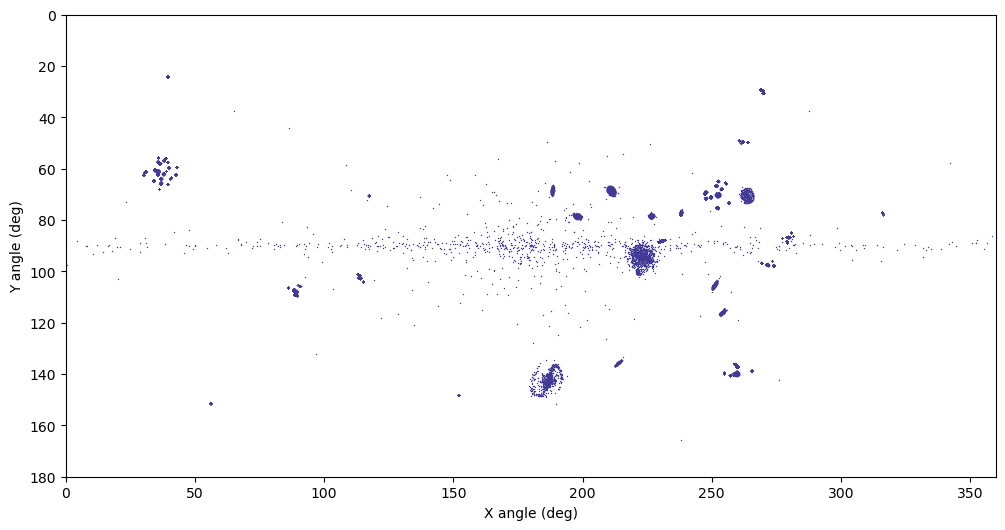

In [37]:
import pandas as pd

for i, direct in enumerate(["Front", "Back", "Left", "Right", "Top", "Bottom"]):
     
        stardata = pd.read_csv(datapath + f'/{direct}/Star_Data.csv')  
        u = stardata["X"].to_numpy(); v = stardata["Y"].to_numpy() 
        azimuth, theta = cube_to_equirect(direct, u, v) 
        azimuth = np.around(azimuth, decimals=4); theta = np.around(theta, decimals=4) 
        
        df = pd.DataFrame({"Equat": azimuth, "Polar": theta}) 
        stardata['X'] = df['Equat']
        stardata["Y"] = df["Polar"]
        #print(stardata)
        stardata = stardata.rename(columns={"X": "Equat", "Y": "Polar"}) 
        if i == 0:
            all_stardata = stardata
        else:
            all_stardata = pd.concat([all_stardata, stardata]) 

fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(all_stardata["Equat"].to_numpy(), all_stardata["Polar"].to_numpy(), s=1, c='#413b96', lw=0);
ax.set_xlim(0, 360); ax.set_ylim(0, 180);
plt.xlabel("X angle (deg)")
plt.ylabel("Y angle (deg)")
ax.invert_yaxis()
all_galaxdata.to_csv(datapath + "/Converted_Star_Data.csv", index=False)
# dont want to save the 'indices' of the data, and I want a space character to separate the data

Text(0, 0.5, 'Y angle (deg)')

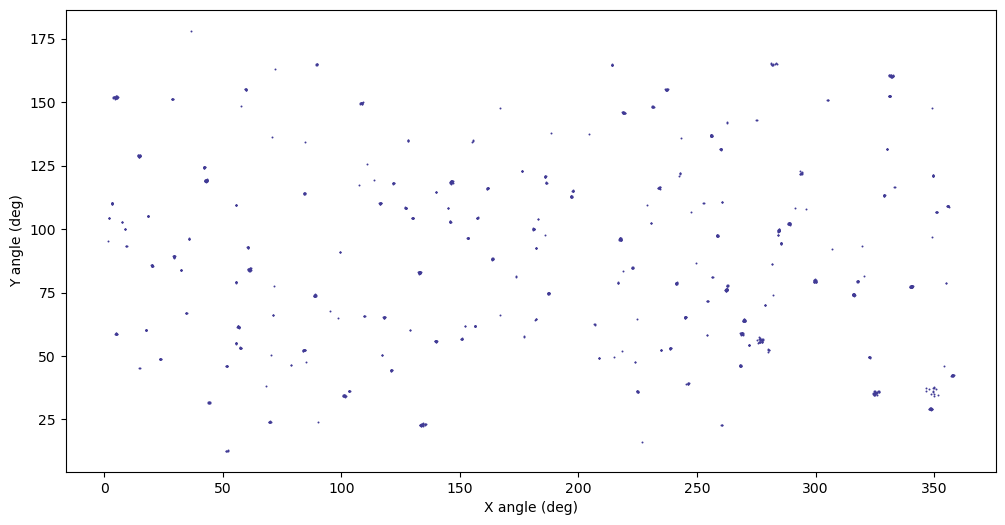

In [41]:
for i, direct in enumerate(["Front", "Back", "Left", "Right", "Top", "Bottom"]):
        galaxdata = pd.read_csv(datapath + f'/{direct}/Distant_Galaxy_Data.csv')  
        u = galaxdata["X"].to_numpy(); v = galaxdata["Y"].to_numpy() 
        azimuth, theta = cube_to_equirect(direct, u, v) 
        azimuth = np.around(azimuth, decimals=4); theta = np.around(theta, decimals=4) 
        
        df = pd.DataFrame({"Equat": azimuth, "Polar": theta}) 
        galaxdata['X'] = df['Equat']
        galaxdata["Y"] = df["Polar"]
        galaxdata = galaxdata.rename(columns={"X": "Equat", "Y": "Polar"}) 
        if i == 0:
            all_galaxdata = galaxdata
        else:
            all_galaxdata = pd.concat([all_galaxdata, galaxdata]) 

fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(all_galaxdata["Equat"].to_numpy(), all_galaxdata["Polar"].to_numpy(), s=2, c='#413b96', lw=0);
#ax.set_xlim(0, 360); ax.set_ylim(0, 180);
#ax.invert_yaxis();
plt.xlabel("X angle (deg)")
plt.ylabel("Y angle (deg)")

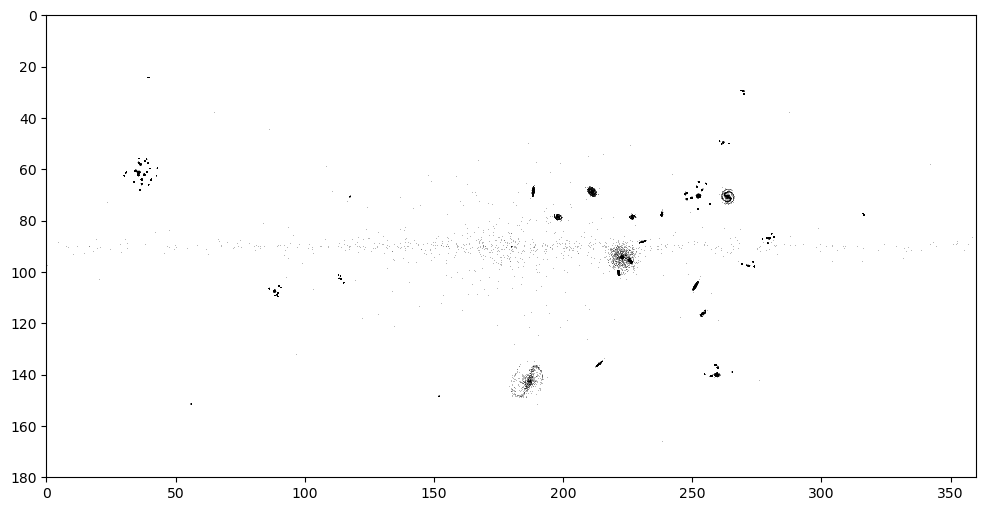

In [40]:
import pandas as pd

for i, direct in enumerate(["Front", "Back", "Left", "Right", "Top", "Bottom"]):
        # read the data from the .txt file into a dataframe
        stardata = pd.read_csv(datapath + f'/{direct}/Star_Data.csv')  
        u = stardata["X"].to_numpy(); v = stardata["Y"].to_numpy() # convert X and Y data to "U" and "V" data
        azimuth, theta = cube_to_equirect(direct, u, v) # perform the coordinate transform
        azimuth = np.around(azimuth, decimals=4); theta = np.around(theta, decimals=4) # round to appropriate decimals
        
        df = pd.DataFrame({"Equat": azimuth, "Polar": theta}) # make a temporary DataFrame object with new coordinates
        # now overwrite the old coordinates with the new ones
        stardata['X'] = df['Equat']
        stardata["Y"] = df["Polar"]
        stardata = stardata.rename(columns={"X": "Equat", "Y": "Polar"}) # and finally change the name of the columns 
        if i == 0:
            # if this is the first iteration, write to a new DataFrame that will store all of the star data
            all_stardata = stardata
        else:
            all_stardata = pd.concat([all_stardata, stardata]) # add this face stardata to the rest of the data

# now let's plot the data to see if it's worked!
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(all_stardata["Equat"].to_numpy(), all_stardata["Polar"].to_numpy(), s=0.1, c='k', lw=0);
ax.set_xlim(0, 360); ax.set_ylim(0, 180);
ax.invert_yaxis();